In [1]:
# Import required libraries
import pickle
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import learning_curve

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
def compute_accuracy(y_true, y_pred):
    """
    Computes the accuracy as (number of matching labels / total labels).
    """
    correct_predictions = sum(1 for true_label, predicted in zip(y_true, y_pred) if true_label == predicted)
    return correct_predictions / len(y_true)

# Load pose angle data from a pickle file
with open(r'pose_30.pickle', 'rb') as f:
    angles_dict = pickle.load(f)

angles_data = np.array(angles_dict['data'])   
angles_labels = np.array(angles_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(
    angles_data,
    angles_labels,
    test_size=0.2,
    shuffle=True,
    stratify=angles_labels
)

model = RandomForestClassifier(
    n_estimators=100,      
    max_depth=6,           
    min_samples_split=3,   
    min_samples_leaf=2,    
    bootstrap=True,        
    criterion='entropy',   
    oob_score=True         
)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)
accuracy_score = compute_accuracy(y_test, y_predict)
print(f"{accuracy_score * 100:.2f}% of samples were classified correctly!")

# Save the trained model as a pickle file
with open(r'Models\pose_model.p', 'wb') as f:
    pickle.dump({'model': model}, f)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


84.69565217391303% of samples were classified correctly!


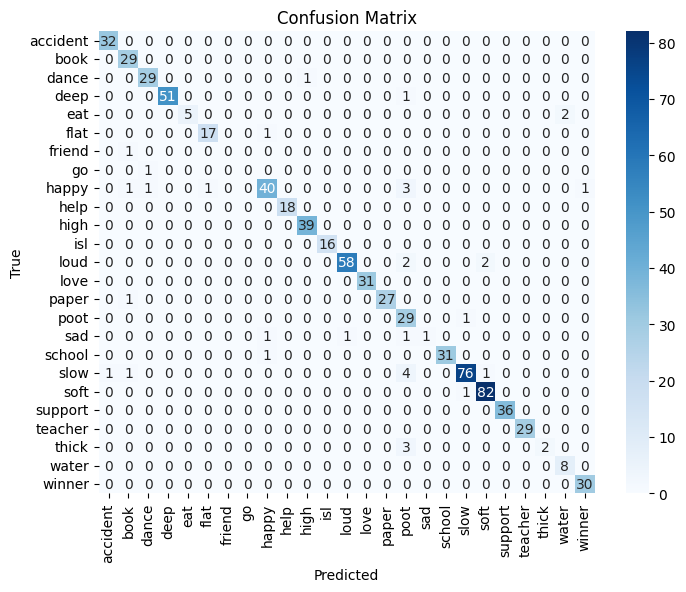


Classification Report:
              precision    recall  f1-score   support

    accident       0.97      1.00      0.98        32
        book       0.88      1.00      0.94        29
       dance       0.94      0.97      0.95        30
        deep       1.00      0.98      0.99        52
         eat       1.00      0.71      0.83         7
        flat       0.94      0.94      0.94        18
      friend       0.00      0.00      0.00         1
          go       0.00      0.00      0.00         1
       happy       0.93      0.85      0.89        47
        help       1.00      1.00      1.00        18
        high       0.97      1.00      0.99        39
         isl       1.00      1.00      1.00        16
        loud       0.98      0.94      0.96        62
        love       1.00      1.00      1.00        31
       paper       1.00      0.96      0.98        28
        poot       0.67      0.97      0.79        30
         sad       1.00      0.25      0.40         4
   

c:\Users\Tarnished\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tarnished\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tarnished\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

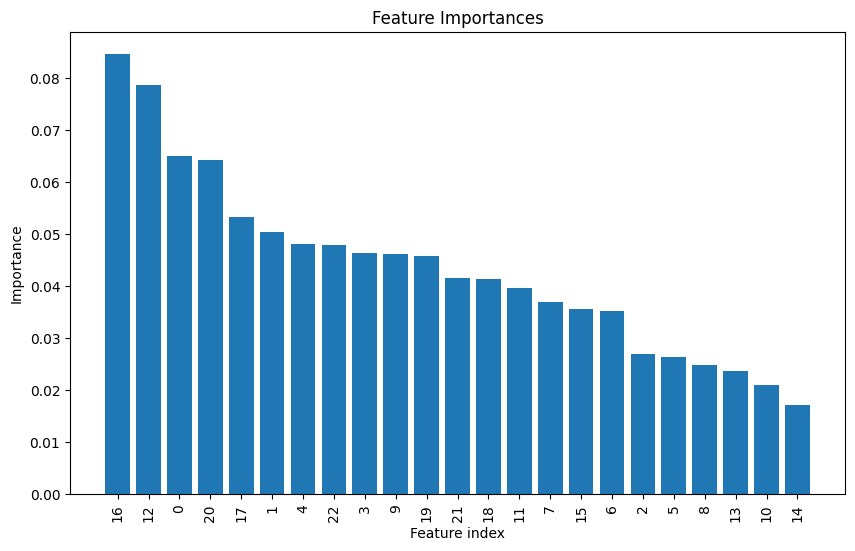

c:\Users\Tarnished\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Cross-Validation Score (5-fold): 94.03%

Out-of-Bag (OOB) Score: 0.9576948700866089


c:\Users\Tarnished\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


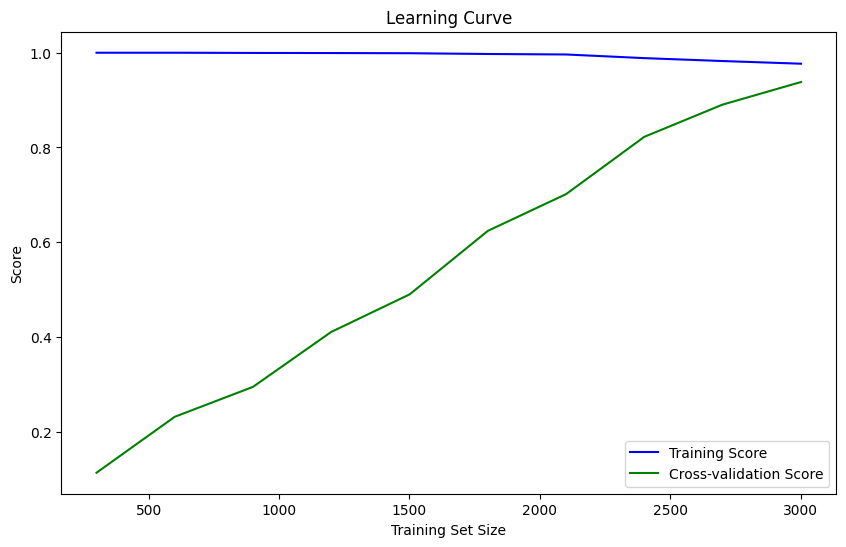

In [ ]:
# 1. Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2. Classification Report
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_predict))

# 3. Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices, rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

# 4. Cross-Validation (k=5)
cross_val_score_mean = cross_val_score(model, angles_data, angles_labels, cv=5).mean()
print(f"\nCross-Validation Score (5-fold): {cross_val_score_mean * 100:.2f}%")

# 5. Out-of-Bag Score (if applicable)
oob_score = model.oob_score_ if hasattr(model, 'oob_score_') else 'N/A'
print(f"\nOut-of-Bag (OOB) Score: {oob_score}")

# 6. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model,
    angles_data,
    angles_labels,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score", color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation Score", color='green')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()